In [1]:
import sys
sys.path.append('app')
sys.path

['/home/roman/Documents/code/DendroTweaks',
 '/home/roman/anaconda3/envs/chapy/lib/python311.zip',
 '/home/roman/anaconda3/envs/chapy/lib/python3.11',
 '/home/roman/anaconda3/envs/chapy/lib/python3.11/lib-dynload',
 '',
 '/home/roman/anaconda3/envs/chapy/lib/python3.11/site-packages',
 'app']

In [2]:
from model.model import CellModel
from model.mechanisms.pparser import parser
from pprint import pprint
import re

INFO       - cells.py - load_mechanisms : Loaded mod files from "app/model/mechanisms/mod/Synapses/"


NEURON mechanisms not found in app/model/mechanisms/mod/Synapses/.


In [3]:
from model.mechanisms.pparser import *

In [4]:
mdl = CellModel(path_to_model='app/model/')

In [5]:
mdl.list_mod_files(mod_folder='mod_cadyn')

['Hay_cadyn', 'Park_cadyn', 'Poirazi_cadyn']

In [6]:
import os
path_to_mod_files = 'app/model/mechanisms/mod_cadyn'
list_of_mod_files = [path_to_mod_files + '/' + file + '/' + file + '.mod' for file in os.listdir(path_to_mod_files)]
list_of_mod_files

['app/model/mechanisms/mod_cadyn/Poirazi_cadyn/Poirazi_cadyn.mod',
 'app/model/mechanisms/mod_cadyn/Hay_cadyn/Hay_cadyn.mod',
 'app/model/mechanisms/mod_cadyn/Park_cadyn/Park_cadyn.mod']

In [7]:
# import os
# path_to_mod_files = 'model/mechanisms/mod_standard'
# list_of_mod_files = [path_to_mod_files + '/' + file + '/' + file + '.mod' for file in os.listdir(path_to_mod_files)]
# list_of_mod_files

In [8]:
for i, mod_file in enumerate(list_of_mod_files):
    if 'SK' in mod_file:
        print(i, mod_file)


In [9]:
path_to_mod_file = list_of_mod_files[0]
print(path_to_mod_file)
parser.read_file(path_to_mod_file)
parser.clean()

app/model/mechanisms/mod_cadyn/Poirazi_cadyn/Poirazi_cadyn.mod


In [10]:
parser.parse_basic(mod_file=path_to_mod_file)

In [11]:
parser.suffix

'cadyn_poirazi'

In [14]:
print(parser.ast_to_python())

import numpy as np
try:
    from ..channels import CustomVoltageDependentIonChannel
except:
    from channels import CustomVoltageDependentIonChannel

class Poirazi_km(CustomVoltageDependentIonChannel):
    def __init__(self, cell=None):
        super().__init__(name='Poirazi_km', suffix='km', cell=cell)
        self.ion = 'k'
        self.range_params = [
            'gbar',
        ]
        self.gbar = 0 # pS/um2
        self.tha = -30 # mV
        self.qa = 9 # mV
        self.Ra = 0.001 # /ms
        self.Rb = 0.001 # /ms
        self.temp = 23 # degC
        self.q10 = 2.3 # 
        self.celsius = 37 # degC
        self.v = np.linspace(-100, 100, 1000)
        self.state_vars = {
            "n": {
                "inf": "ninf",
                "tau": "ntau",
                "power": 1
            },
        }

    def rates(self, v):
        self.tadj = self.q10 ** ((self.celsius - self.temp) / 10)
        self.a = (self.Ra * (v - self.tha)) / (1 - np.exp((-((v - self.tha)) / s

In [13]:
parser.ast['mod_file']['function_blocks']

[{'signature': {'f_name': 'alpm', 'params': [{'name': 'v', 'unit': 'mV'}]},
  'locals': [],
  'assignment_statements': [{'assigned_var': 'alpm',
    'expression': {'exp': [{'/': [{'*': [{'*': [{'*': [0.001, 'zetam']},
            {'-': ['v', 'vhalfm']}]},
          96480.0]},
        {'*': [8.315, {'+': [273.16, 'celsius']}]}]}]}}],
  'statements': [{'assigned_var': 'alpm',
    'expression': {'exp': [{'/': [{'*': [{'*': [{'*': [0.001, 'zetam']},
            {'-': ['v', 'vhalfm']}]},
          96480.0]},
        {'*': [8.315, {'+': [273.16, 'celsius']}]}]}]}}]},
 {'signature': {'f_name': 'alph', 'params': [{'name': 'v', 'unit': 'mV'}]},
  'locals': [],
  'assignment_statements': [{'assigned_var': 'alph',
    'expression': {'exp': [{'/': [{'*': [{'*': [{'*': [0.001, 'zetah']},
            {'-': ['v', 'vhalfh']}]},
          96480.0]},
        {'*': [8.315, {'+': [273.16, 'celsius']}]}]}]}}],
  'statements': [{'assigned_var': 'alph',
    'expression': {'exp': [{'/': [{'*': [{'*': [{'*': [

In [9]:
# parser.remove_suffix_from_variable_names()

In [10]:
print(parser._get_block_regex('NEURON')[0])
neuron_block.parseString(parser._get_block_regex('NEURON')[0]).as_dict()

NEURON {
	SUFFIX can
	USEION ca READ cai, eca WRITE ica 
    RANGE gcabar, ica, po
	GLOBAL hinf, minf, s_inf
}


{'neuron_block': {'suffix': 'can',
  'use_ion': [{'ion': 'ca', 'read_var': 'eca', 'write_var': 'ica'}],
  'range_vars': ['gcabar', 'ica', 'po'],
  'global_vars': ['hinf', 'minf', 's_inf']}}

In [11]:
print(parser._get_block_regex('UNITS')[0])
units_block.parseString(parser._get_block_regex('UNITS')[0]).as_dict()

UNITS {
	(mA) = (milliamp)
	(mV) = (millivolt)
	(molar) = (1/liter)
	(mM) =	(millimolar)
	FARADAY = (faraday) (coulomb)
	R = (k-mole) (joule/degC)
}


{'units_block': {'mA': 'milliamp',
  'mV': 'millivolt',
  'molar': '1/liter',
  'mM': 'millimolar'}}

In [12]:
print(parser._get_block_regex('ASSIGNED')[0])
assigned_block.parseString(parser._get_block_regex('ASSIGNED')[0]).as_dict()

ASSIGNED {     
	v            (mV)
	celsius      (degC)
	ica          (mA/cm2)
	po
	cai          (mM)      
	eca             (mV)
        minf
        hinf
	s_inf
}


{'assigned_block': [{'name': 'v', 'unit': 'mV'},
  {'name': 'celsius', 'unit': 'degC'},
  {'name': 'ica', 'unit': 'mA/cm2'},
  {'name': 'po'},
  {'name': 'cai', 'unit': 'mM'},
  {'name': 'eca', 'unit': 'mV'},
  {'name': 'minf'},
  {'name': 'hinf'},
  {'name': 's_inf'}]}

In [13]:
print(parser._get_block_regex('PARAMETER')[0])
parameter_block.parseString(parser._get_block_regex('PARAMETER')[0]).as_dict()

PARAMETER {           
	gcabar = 0   (mho/cm2)  
  	ki     = 0.025  (mM)            
	zetam = -3.4
	zetah = 2
	vhalfm =-21 (mV)
	vhalfh =-40 (mV)
	tm0=1.5(ms)
	th0=75(ms)
	taumin  = 2    (ms)            
}


{'parameter_block': [{'name': 'gcabar', 'value': 0, 'unit': 'mho/cm2'},
  {'name': 'ki', 'value': 0.025, 'unit': 'mM'},
  {'name': 'zetam', 'value': -3.4},
  {'name': 'zetah', 'value': 2},
  {'name': 'vhalfm', 'value': -21, 'unit': 'mV'},
  {'name': 'vhalfh', 'value': -40, 'unit': 'mV'},
  {'name': 'tm0', 'value': 1.5, 'unit': 'ms'},
  {'name': 'th0', 'value': 75, 'unit': 'ms'},
  {'name': 'taumin', 'value': 2, 'unit': 'ms'}]}

In [14]:
print(parser._get_block_regex('STATE')[0])
state_block.parseString(parser._get_block_regex('STATE')[0]).as_dict()

STATE {	
	m 
	h 
	s
}


{'state_block': ['m', 'h', 's']}

In [15]:
print(parser._get_block_regex('BREAKPOINT')[0])
breakpoint_block.parseString(parser._get_block_regex('BREAKPOINT')[0]).as_dict()

BREAKPOINT {
	SOLVE states METHOD cnexp
	po = m*m*h
 	ica = gcabar *po*h2(cai) * (v - eca)

}


{'breakpoint_block': {'solve_stmt': {'solve': 'states', 'method': 'cnexp'},
  'statements': [{'assigned_var': 'po',
    'expression': {'*': [{'*': ['m', 'm']}, 'h']}},
   {'assigned_var': 'ica',
    'expression': {'*': [{'*': [{'*': ['gcabar', 'po']}, {'h2': ['cai']}]},
      {'-': ['v', 'eca']}]}}]}}

In [16]:
print(parser._get_block_regex('INITIAL')[0])
initial_block.parseString(parser._get_block_regex('INITIAL')[0]).as_dict()

INITIAL {
	rates(v,cai)
        m = minf
        h = hinf
	s = s_inf
}


{'initial_block': {'statements': [{'rates': ['v', 'cai']},
   {'assigned_var': 'm', 'expression': 'minf'},
   {'assigned_var': 'h', 'expression': 'hinf'},
   {'assigned_var': 's', 'expression': 's_inf'}]}}

In [17]:
print(parser._get_block_regex('DERIVATIVE')[0])
derivative_block.parseString(parser._get_block_regex('DERIVATIVE')[0]).as_dict()

DERIVATIVE states {
	rates(v,cai)
	m' = (minf -m)/tm0
	h'=  (hinf - h)/th0
	s' = (s_inf-s)/taumin
}


{'derivative_block': {'name': 'states',
  'func_calls': [{'rates': ['v', 'cai']}],
  'statements': [{'assigned_var': 'm',
    'expression': {'/': [{'-': ['minf', 'm']}, 'tm0']}},
   {'assigned_var': 'h', 'expression': {'/': [{'-': ['hinf', 'h']}, 'th0']}},
   {'assigned_var': 's',
    'expression': {'/': [{'-': ['s_inf', 's']}, 'taumin']}}]}}

In [18]:
print('\n'.join(parser._get_block_regex('FUNCTION')))
function_blocks.parseString('\n'.join(parser._get_block_regex('FUNCTION'))).as_dict()

FUNCTION h2(cai(mM)) {
	h2 = ki/(ki+cai)
}
FUNCTION ghk(v(mV), ci(mM), co(mM)) (coul/cm3) {
	LOCAL z, eci, eco
	z = (1e-3)*2*FARADAY*v/(R*(celsius+273.15))
	eco = co*efun(z)
	eci = ci*efun(-z)
	ghk = (.001)*2*FARADAY*(eci - eco)
}
FUNCTION efun(z) {
	if (fabs(z) < 1e-4) {
		efun = 1 - z/2
	}else{
		efun = z/(exp(z) - 1)
	}
}
FUNCTION alpm(v(mV)) {

  alpm = exp(1.e-3*zetam*(v-vhalfm)*9.648e4/(8.315*(273.16+celsius))) 

}
FUNCTION alph(v(mV)) {

  alph = exp(1.e-3*zetah*(v-vhalfh)*9.648e4/(8.315*(273.16+celsius))) 

}


{'function_blocks': [{'signature': {'f_name': 'h2',
    'params': [{'name': 'cai', 'unit': 'mM'}]},
   'locals': [],
   'assignment_statements': [{'assigned_var': 'h2',
     'expression': {'/': ['ki', {'+': ['ki', 'cai']}]}}],
   'statements': [{'assigned_var': 'h2',
     'expression': {'/': ['ki', {'+': ['ki', 'cai']}]}}]},
  {'signature': {'f_name': 'ghk',
    'params': [{'name': 'v', 'unit': 'mV'},
     {'name': 'ci', 'unit': 'mM'},
     {'name': 'co', 'unit': 'mM'}],
    'returned_unit': 'coul/cm3'},
   'locals': ['z', 'eci', 'eco'],
   'assignment_statements': [{'assigned_var': 'z',
     'expression': {'/': [{'*': [{'*': [{'*': [0.001, 2]}, 'FARADAY']}, 'v']},
       {'*': ['R', {'+': ['celsius', 273.15]}]}]}},
    {'assigned_var': 'eco', 'expression': {'*': ['co', {'efun': ['z']}]}},
    {'assigned_var': 'eci',
     'expression': {'*': ['ci', {'efun': [{'-': ['z']}]}]}},
    {'assigned_var': 'ghk',
     'expression': {'*': [{'*': [{'*': [0.001, 2]}, 'FARADAY']},
       {'-': ['ec

In [18]:
print('\n'.join(parser._get_block_regex('PROCEDURE')))
procedure_blocks.parseString('\n'.join(parser._get_block_regex('PROCEDURE'))).as_dict()

PROCEDURE rates(v (mV), cai(mM)) { 
        LOCAL a, b, alpha2
        
	a = alpm(v)
	minf = 1/(1+a)
        
        b = alph(v)
	hinf = 1/(1+b)
	alpha2 = (ki/cai)^2
	s_inf = alpha2 / (alpha2 + 1)
}


{'procedure_blocks': [{'signature': {'f_name': 'rates',
    'params': [{'name': 'v', 'unit': 'mV'}, {'name': 'cai', 'unit': 'mM'}]},
   'locals': ['a', 'b', 'alpha2'],
   'assignment_statements': [{'assigned_var': 'a',
     'expression': {'alpm': ['v']}},
    {'assigned_var': 'minf', 'expression': {'/': [1, {'+': [1, 'a']}]}},
    {'assigned_var': 'b', 'expression': {'alph': ['v']}},
    {'assigned_var': 'hinf', 'expression': {'/': [1, {'+': [1, 'b']}]}},
    {'assigned_var': 'alpha2', 'expression': {'^': [{'/': ['ki', 'cai']}, 2]}},
    {'assigned_var': 's_inf',
     'expression': {'/': ['alpha2', {'+': ['alpha2', 1]}]}}],
   'statements': [{'assigned_var': 'a', 'expression': {'alpm': ['v']}},
    {'assigned_var': 'minf', 'expression': {'/': [1, {'+': [1, 'a']}]}},
    {'assigned_var': 'b', 'expression': {'alph': ['v']}},
    {'assigned_var': 'hinf', 'expression': {'/': [1, {'+': [1, 'b']}]}},
    {'assigned_var': 'alpha2', 'expression': {'^': [{'/': ['ki', 'cai']}, 2]}},
    {'assign

In [20]:
parser.parse(path_to_mod_file)

In [21]:
for block in ['title',
              'comment_block',
              'neuron_block',
              'units_block',
              'parameter_block',
              'assigned_block',
              'state_block',
              'breakpoint_block',
              'initial_block',
              'derivative_block',
              'function_blocks',
              'procedure_blocks']:
    if block not in parser.ast['mod_file']:
        print(f'  {block}')
    else:
        print(f'+ {block}')
    
# pprint([k for k in parser.ast['mod_file']])

+ title
  comment_block
+ neuron_block
+ units_block
+ parameter_block
+ assigned_block
+ state_block
+ breakpoint_block
+ initial_block
+ derivative_block
+ function_blocks
+ procedure_blocks


In [23]:
parser.ast_to_python()

['alf', 'v', 'va']
['bet', 'v', 'vb']


'import numpy as np\ntry:\n    from ..channels import CustomIonChannel\nexcept:\n    from channels import CustomIonChannel\n\nclass kdrin_PV(CustomIonChannel):\n    def __init__(self, cell=None):\n        super().__init__(name=\'kdrin_PV\', suffix=\'kdrin\', cell=cell)\n        self.ion = \'k\'\n        self.range_params = [\n            \'gbar\',\n        ]\n        self.gbar = 0.0338 # mho/cm2\n        self.celsius = 37 # degC\n        self.v = np.linspace(-100, 100, 1000)\n        self.state_vars = {\n            "n": {\n                "inf": "inf_n",\n                "tau": "tau_n",\n                "power": 4\n            },\n        }\n\n    def alf(self, v):\n        va = v - 13\n        conditions = [np.abs(va) < 0.0001,\n                      ~(np.abs(va) < 0.0001)]\n        choices = [va + 0.0001,\n                   va]\n        va = np.select(conditions, choices)\n        conditions = [np.abs(va) < 0.0001,\n                      ~(np.abs(va) < 0.0001)]\n        choices = [

# Parameter blocks

In [17]:
pprint(parser.ast['mod_file']['units_block'])

{'S': 'siemens',
 'mA': 'milliamp',
 'mM': 'millimolar',
 'mV': 'millivolt',
 'molar': '1/liter'}


In [18]:
pprint(parser.ast['mod_file']['parameter_block'])

[{'name': 'gbar', 'unit': 'S/cm2', 'value': 0.0},
 {'name': 'caix', 'unit': '1', 'value': 1},
 {'name': 'Ra', 'unit': '/ms', 'value': 0.01},
 {'name': 'Rb', 'unit': '/ms', 'value': 0.02},
 {'name': 'temp', 'unit': 'degC', 'value': 23},
 {'name': 'q10', 'unit': '1', 'value': 2.3}]


In [19]:
parser.is_ca_dependent()

True

In [20]:
for assigned in parser.ast['mod_file']['assigned_block']:
    if 'cai' in assigned['name'].lower():
        print(assigned['name'])
    # print(assigned['name'])

cai


In [14]:
pprint(parser.ast['mod_file']['assigned_block'])

[{'name': 'v', 'unit': 'mV'},
 {'name': 'cai', 'unit': 'mM'},
 {'name': 'ik', 'unit': 'mA/cm2'},
 {'name': 'gk', 'unit': 'S/cm2'},
 {'name': 'ek', 'unit': 'mV'},
 {'name': 'ninf', 'unit': '1'},
 {'name': 'ntau', 'unit': 'ms'},
 {'name': 'tadj', 'unit': '1'},
 {'name': 'celsius', 'unit': 'degC'}]


In [ ]:
print(parser.ast['mod_file']['state_block'])

{'m': 2, 'h': 1}


In [ ]:
pprint(parser.ast['mod_file']['breakpoint_block'])

{'solve_stmt': {'method': 'cnexp', 'solve': 'states'},
 'statements': [{'assigned_var': 'g',
                 'expression': {'*': [{'*': [{'*': ['gbar', 'm']}, 'm']},
                                      'h']}},
                {'assigned_var': 'ik',
                 'expression': {'*': ['g', {'-': ['v', 'ek']}]}}]}


array([3.72007598e-42, 4.53552246e-42, 5.52969384e-42, 6.74175703e-42,
       8.21946111e-42, 1.00210176e-41, 1.22173925e-41, 1.48951008e-41,
       1.81596125e-41, 2.21395051e-41, 2.69915258e-41, 3.29067620e-41,
       4.01181635e-41, 4.89097126e-41, 5.96276018e-41, 7.26938603e-41,
       8.86229640e-41, 1.08042084e-40, 1.31715768e-40, 1.60576028e-40,
       1.95759016e-40, 2.38649729e-40, 2.90936508e-40, 3.54677463e-40,
       4.32381448e-40, 5.27106764e-40, 6.42581471e-40, 7.83350040e-40,
       9.54952118e-40, 1.16414042e-39, 1.41914634e-39, 1.73000366e-39,
       2.10894320e-39, 2.57087380e-39, 3.13396858e-39, 3.82037956e-39,
       4.65710871e-39, 5.67706957e-39, 6.92038135e-39, 8.43594614e-39,
       1.02833714e-38, 1.25353132e-38, 1.52803319e-38, 1.86263738e-38,
       2.27050131e-38, 2.76766234e-38, 3.37366807e-38, 4.11234446e-38,
       5.01273214e-38, 6.11022751e-38, 7.44797353e-38, 9.07855477e-38,
       1.10660634e-37, 1.34886168e-37, 1.64414269e-37, 2.00405393e-37,
      

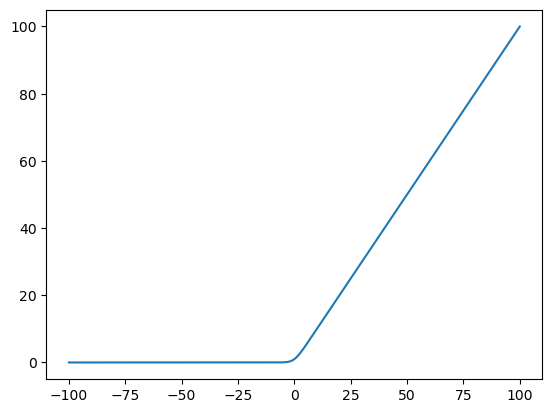

In [18]:
import numpy as np
def rateconst(v, r, v12, q):
    conditions = [((np.abs(((v - v12) / q)) > 0)), ~(((np.abs(((v - v12) / q)) > 0)))]
    choices = [((r * (v - v12)) / (1 - np.exp((-((v - v12)) / q)))), (r * q)]
    rateconst = np.select(conditions, choices)
    return rateconst

_v = np.linspace(-100, 100, 1000)
import matplotlib.pyplot as plt
plt.plot(_v, rateconst(_v, 1, 0, 1))
rateconst(_v, 1, 0, 1)

In [ ]:
pprint(parser.ast['mod_file']['initial_block'])

{'func_calls': [{'rates': []}],
 'statements': [{'assigned_var': 'm', 'expression': 'mInf'},
                {'assigned_var': 'h', 'expression': 'hInf'}]}


In [ ]:
pprint(parser.ast['mod_file']['derivative_block'])

{'func_calls': [{'rates': []}],
 'name': 'states',
 'statements': [{'assigned_var': 'm',
                 'expression': {'/': [{'-': ['mInf', 'm']}, 'mTau']}},
                {'assigned_var': 'h',
                 'expression': {'/': [{'-': ['hInf', 'h']}, 'hTau']}}]}


# Functional blocks

In [ ]:
print(f"Number of functions: {len(parser.ast['mod_file']['function_blocks'])}")

KeyError: 'function_blocks'

In [ ]:
for f in parser.ast['mod_file']['function_blocks']:
    pprint(f)

{'if_else_statements': [],
 'locals': [],
 'signature': {'f_name': 'alpha_prime',
               'params': [{'name': 'v', 'unit': 'mV'},
                          {'name': 'k', 'unit': '1/ms'},
                          {'name': 'delta', 'unit': ['1']},
                          {'name': 'vhalf', 'unit': 'mV'},
                          {'name': 'sigma', 'unit': 'mV'}],
               'returned_unit': '1/ms'},
 'statements': [{'assigned_var': 'alpha_prime',
                 'expression': {'*': ['k',
                                      {'exp': [{'/': [{'*': ['delta',
                                                             {'-': ['v',
                                                                    'vhalf']}]},
                                                      'sigma']}]}]}}]}
{'if_else_statements': [],
 'locals': [],
 'signature': {'f_name': 'beta_prime',
               'params': [{'name': 'v', 'unit': 'mV'},
                          {'name': 'k', 'unit': '1/ms'},
       

# Procedure blocks

In [12]:
print(f"Number of procedures: {len(parser.ast['mod_file']['procedure_blocks'])}")

Number of procedures: 1


In [13]:
parser.ast['mod_file']['procedure_blocks'][0]

{'signature': {'f_name': 'rates'},
 'locals': [],
 'if_else_statements': [{'expression': {'==': ['v', {'-': [27]}]},
   'condition': {'==': ['v', {'-': [27]}]},
   'if_statements': [{'assigned_var': 'v',
     'expression': {'+': ['v', 0.0001]}}]}],
 'assignment_statements': [{'assigned_var': 'mAlpha',
   'expression': {'/': [{'*': [0.055, {'-': [{'-': [27]}, 'v']}]},
     {'-': [{'exp': [{'/': [{'-': [{'-': [27]}, 'v']}, 3.8]}]}, 1]}]}},
  {'assigned_var': 'mBeta',
   'expression': {'*': [0.94,
     {'exp': [{'/': [{'-': [{'-': [75]}, 'v']}, 17]}]}]}},
  {'assigned_var': 'mInf',
   'expression': {'/': ['mAlpha', {'+': ['mAlpha', 'mBeta']}]}},
  {'assigned_var': 'mTau',
   'expression': {'/': [1, {'+': ['mAlpha', 'mBeta']}]}},
  {'assigned_var': 'hAlpha',
   'expression': {'*': [0.000457,
     {'exp': [{'/': [{'-': [{'-': [13]}, 'v']}, 50]}]}]}},
  {'assigned_var': 'hBeta',
   'expression': {'/': [0.0065,
     {'+': [{'exp': [{'/': [{'-': [{'-': ['v']}, 15]}, 28]}]}, 1]}]}},
  {'assigne

In [18]:
parser.ast['mod_file']['procedure_blocks'][0]['if_else_statements']

KeyError: 'if_else_statements'

# Class

In [ ]:
parser.restore_expression({'alpn': ['v']})

'alpn(v)'

In [14]:
parser.ast['mod_file']['procedure_blocks'][0]['if_else_statements']

[{'expression': {'<': ['v', {'-': [50]}]},
  'condition': {'<': ['v', {'-': [50]}]},
  'if_statements': [{'assigned_var': 'mTau',
    'expression': {'/': [{'+': [1.25,
        {'*': [175.03, {'exp': [{'*': [{'-': ['v']}, {'-': [0.026]}]}]}]}]},
      'qt']}}],
  'else_statements': [{'assigned_var': 'mTau',
    'expression': {'/': [{'+': [1.25,
        {'*': [13, {'exp': [{'*': [{'-': ['v']}, 0.026]}]}]}]},
      'qt']}}]}]

In [12]:
txt = """
if (v == -38) {
    v = v + 0.0001
}
"""
parser.extend_expression(txt)

'\nif (self.v == -38) {\n    self.v = self.v + 0.0001\n}\n'

In [9]:
print(parser.ast_to_python())

import numpy as np
try:
    from ..channels import CustomIonChannel
except:
    from channels import CustomIonChannel

class K_Pst_Hay(CustomIonChannel):
    def __init__(self, cell=None):
        super().__init__(name='K_Pst_Hay', suffix='K_Pst', cell=cell)
        self.ion = 'k'
        self.range_params = [
            'gbar',
        ]
        self.gbar = 1e-05 # S/cm2
        self.celsius = 37 # degC
        self.v = np.linspace(-100, 100, 1000)
        self.state_vars = {
            "m": {
                "inf": "mInf",
                "tau": "mTau",
                "power": 2
            },
            "h": {
                "inf": "hInf",
                "tau": "hTau",
                "power": 1
            },
        }

    def rates(self):
        self.qt = 2.3 ** ((34 - 21) / 10)
        self.v = self.v + 10
        self.mInf = 1 / (1 + np.exp((-((self.v + 1)) / 12)))
        self.hInf = 1 / (1 + np.exp((-((self.v + 54)) / -(11))))
        self.hTau = (360 + ((1010 + (24 * 

In [9]:
from model.mechanisms.collection.KCa_Park_ref import KCa_Park_ref

In [10]:
kca = KCa_Park_ref()

In [12]:
import numpy as np
kca.update(np.logspace(-5, 5, 1000))

In [16]:
kca.state_vars

{'n': {'inf': 'ninf', 'tau': 'ntau', 'power': 1}}

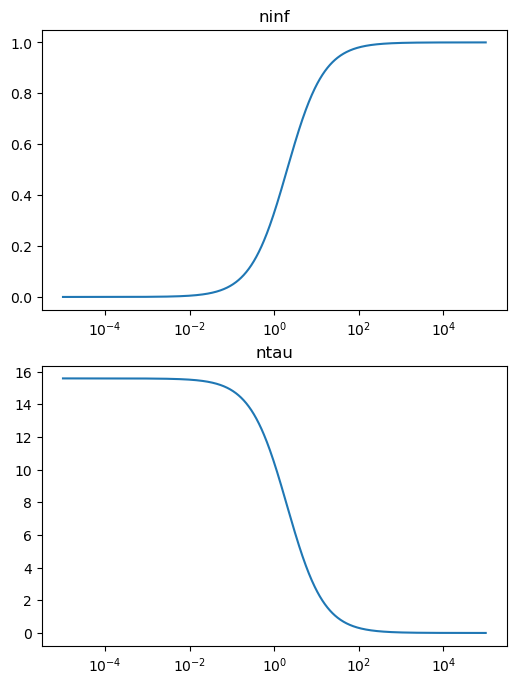

In [22]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(6, 8))
axes[0].plot(np.logspace(-5, 5, 1000), kca.ninf)
axes[0].set_title('ninf')
axes[1].plot(np.logspace(-5, 5, 1000), kca.ntau)
axes[1].set_title('ntau')

for ax in axes:
    ax.set_xscale('log')